### 0. Imports

In [98]:
import pandas as pd
from datetime import datetime
from statistics import mean

from sktime.utils.plotting import plot_series

from sklearn.metrics import mean_absolute_error

### 1. Load Data

In [2]:
# demand series
demand = pd.read_csv('../../data/incomplete/clean_pge_demand.csv')

# forecasts
hwdaypreds = pd.read_csv('../../data/forecasts/hw_daypreds.csv')
hwweekpreds = pd.read_csv('../../data/forecasts/hw_weekpreds.csv')
sardaypreds = pd.read_csv('../../data/forecasts/sar1_daypreds.csv')
sarweekpreds = pd.read_csv('../../data/forecasts/sar1_weekpreds.csv')

In [3]:
# convert datetime string to period object
demand['utc'] = [pd.Period(period, freq='H') for period in demand['utc']]

# set-up y as series with period index
y = demand.set_index('utc')['demand_MWh']

In [4]:
# convert each prediction df to series with period index
for preds in [hwdaypreds, hwweekpreds, sardaypreds, sarweekpreds]:
    preds.rename(columns={'Unnamed: 0': 'utc', '0': 'MWh'}, inplace=True)
    preds['utc'] = [pd.Period(period, freq='H') for period in preds['utc']]
    preds.set_index('utc', inplace=True)

### 2. Investigate Hourly Performance

Here I aim to see whether there are certain times of day, especially peak vs. non-peak hours, during which one type of model performs better than the other.

#### 2a) October Weeks

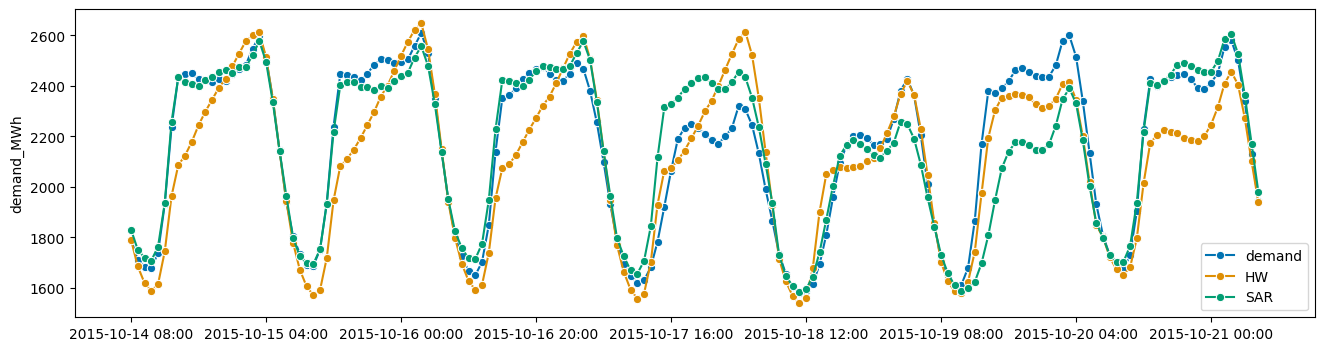

In [16]:
# first year of forecasts: start of forecast period
plot_series(y[2016: 2016+168], hwdaypreds[:168], sardaypreds[:168], labels=['demand', 'HW', 'SAR']);

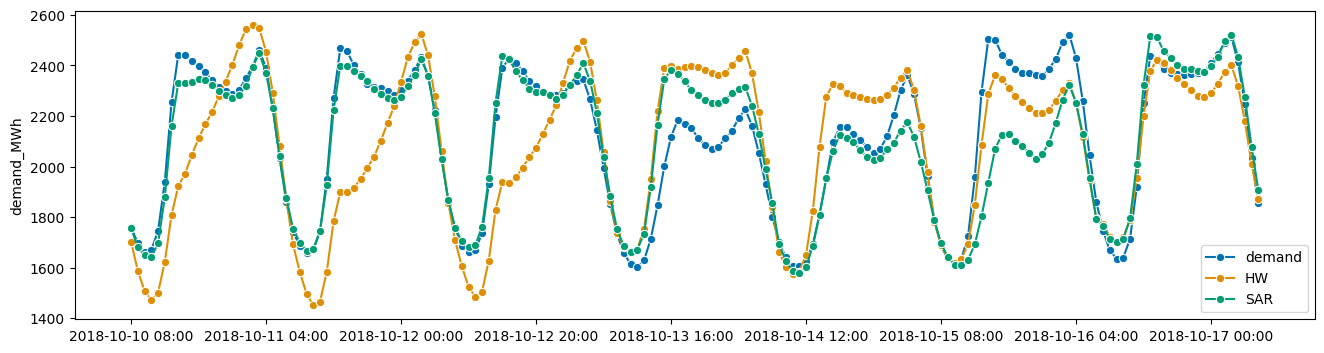

In [14]:
# third year of forecasts: start of forecast series plus 3 years of weeks
plot_series(y[2016 + 168*52*3: 2016 + 168*52*3 + 168],
            hwdaypreds[168*52*3: 168*52*3 + 168],
            sardaypreds[168*52*3: 168*52*3 + 168], labels=['demand', 'HW', 'SAR']);

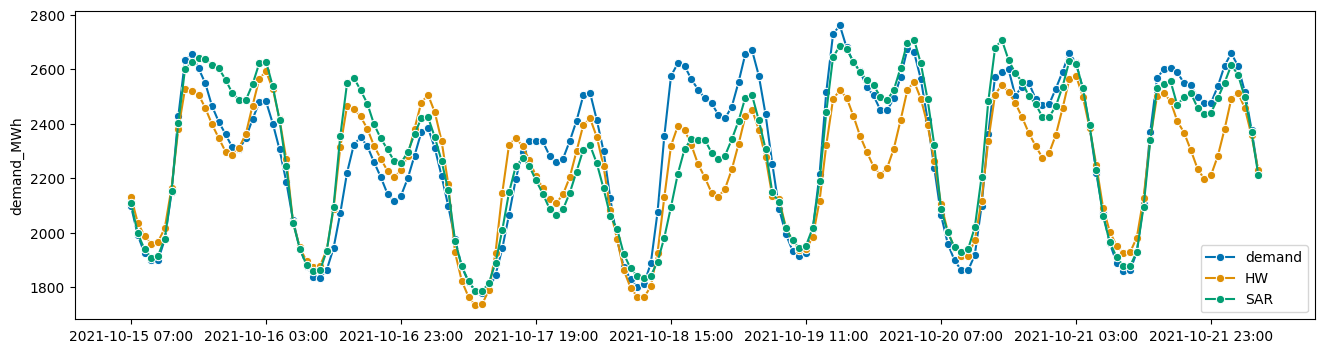

In [15]:
# last year of forecasts: start of forecast series plus 6 years of weeks
plot_series(y[2016 + 168*52*6: 2016 + 168*52*6 + 168],
            hwdaypreds[168*52*6: 168*52*6 + 168],
            sardaypreds[168*52*6: 168*52*6 + 168], labels=['demand', 'HW', 'SAR']);

#### 2b) July Weeks

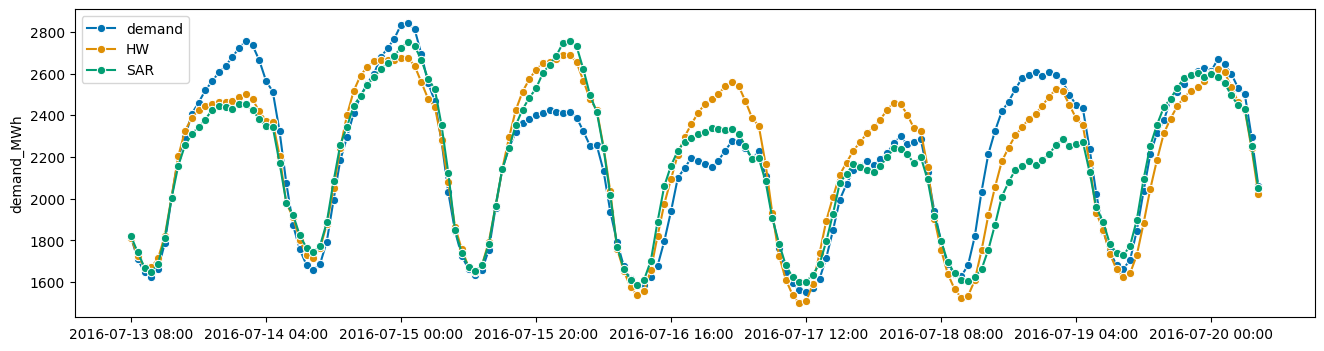

In [23]:
# first year of forecasts: start of forecast series plus 39 weeks (3/4 of 52 weeks)
plot_series(y[2016 + 168*39: 2016 + 168*39 + 168],
            hwdaypreds[168*39: 168*39 + 168],
            sardaypreds[168*39: 168*39 + 168], labels=['demand', 'HW', 'SAR']);

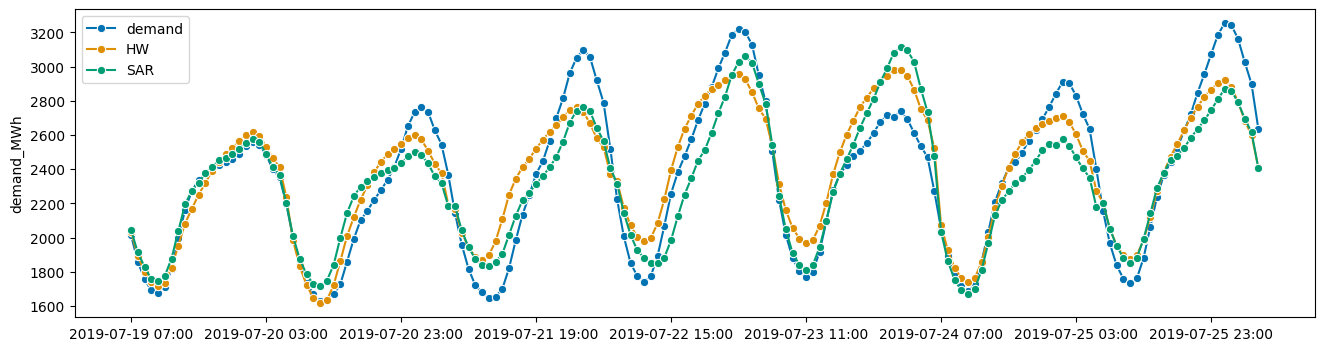

In [24]:
# third year of forecasts: start of forecast series plus 39 weeks, plus 3 years of weeks
plot_series(y[2016 + 168*39 + 168*52*3: 2016 + 168*39 + 168*52*3 + 168],
            hwdaypreds[168*39 + 168*52*3: 168*39 + 168*52*3 + 168],
            sardaypreds[168*39 + 168*52*3: 168*39 + 168*52*3 + 168], labels=['demand', 'HW', 'SAR']);

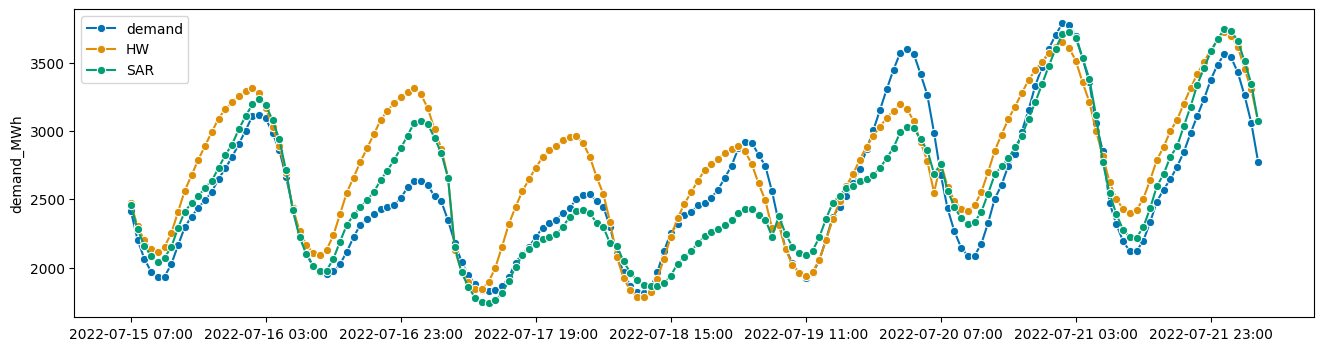

In [13]:
# last year of forecasts: start of forecast series plus 39 weeks, plus 6 years of weeks
plot_series(y[2016 + 168*39 + 168*52*6: 2016 + 168*39 + 168*52*6 + 168],
            hwdaypreds[168*39 + 168*52*6: 168*39 + 168*52*6 + 168],
            sardaypreds[168*39 + 168*52*6: 168*39 + 168*52*6 + 168], labels=['demand', 'HW', 'SAR']);

Plots exhibit misalignment in day of week and hour of day between first two and last October plots, first and last two July plots. Investigation of time-of-day based performance suspended until data issue corrected.

### 3. Investigate Day-of-Week and Hour Misalignment in Plots

In [11]:
pd.period_range(start='2015-07-22 08:00', end='2022-10-10 17:00', freq='H')

PeriodIndex(['2015-07-22 08:00', '2015-07-22 09:00', '2015-07-22 10:00',
             '2015-07-22 11:00', '2015-07-22 12:00', '2015-07-22 13:00',
             '2015-07-22 14:00', '2015-07-22 15:00', '2015-07-22 16:00',
             '2015-07-22 17:00',
             ...
             '2022-10-10 08:00', '2022-10-10 09:00', '2022-10-10 10:00',
             '2022-10-10 11:00', '2022-10-10 12:00', '2022-10-10 13:00',
             '2022-10-10 14:00', '2022-10-10 15:00', '2022-10-10 16:00',
             '2022-10-10 17:00'],
            dtype='period[H]', length=63298)

In [15]:
len(y.index.unique())

63083

Original demand series appears to be missing 215 hours. I checked for missing values in original data cleaning, but it did not occur to me that entire entries, i.e., hour and demand, would be missing.

In [18]:
set(pd.period_range(start='2015-07-22 08:00', end='2022-10-10 17:00', freq='H')).symmetric_difference(y.index)

{Period('2019-03-05 09:00', 'H'),
 Period('2019-03-05 10:00', 'H'),
 Period('2019-03-05 11:00', 'H'),
 Period('2019-03-05 12:00', 'H'),
 Period('2019-03-05 13:00', 'H'),
 Period('2019-03-05 14:00', 'H'),
 Period('2019-03-05 15:00', 'H'),
 Period('2019-03-05 16:00', 'H'),
 Period('2019-03-05 17:00', 'H'),
 Period('2019-03-05 18:00', 'H'),
 Period('2019-03-05 19:00', 'H'),
 Period('2019-03-05 20:00', 'H'),
 Period('2019-03-05 21:00', 'H'),
 Period('2019-03-05 22:00', 'H'),
 Period('2019-03-05 23:00', 'H'),
 Period('2019-03-06 00:00', 'H'),
 Period('2019-03-06 01:00', 'H'),
 Period('2019-03-06 02:00', 'H'),
 Period('2019-03-06 03:00', 'H'),
 Period('2019-03-06 04:00', 'H'),
 Period('2019-03-06 05:00', 'H'),
 Period('2019-03-06 06:00', 'H'),
 Period('2019-03-06 07:00', 'H'),
 Period('2019-03-06 08:00', 'H'),
 Period('2019-03-06 09:00', 'H'),
 Period('2019-03-06 10:00', 'H'),
 Period('2019-03-06 11:00', 'H'),
 Period('2019-03-06 12:00', 'H'),
 Period('2019-03-06 13:00', 'H'),
 Period('2019-

In [17]:
len(set(pd.period_range(start='2015-07-22 08:00', end='2022-10-10 17:00', freq='H')).symmetric_difference(y.index))

215

Confirmed: original demand series is missing values for 215 hours.

In [23]:
pd.Period('2019-03-12 07:00', 'H') - pd.Period('2019-03-05 09:00', 'H')

<166 * Hours>

167 missing hours

In [25]:
pd.Period('2019-03-18 07:00', 'H') - pd.Period('2019-03-16 08:00', 'H')

<47 * Hours>

48 missing hours

The 215 missing hours are in two chunks, one of one hour less than a week (3/5/19 09:00 through 3/12/19 07:00), the other exactly two days (3/16/19 08:00 through 3/18/19 07:00). This explains the irregularities observed in plots of forecasting periods whose days of the week and hours should match up but do not.

Imputation Strategy: Impute each hour with the average of the corresponding hours from prior years.

After imputation, iterative modeling procedure will be re-done before moving on to incorporation of exogenous variables.

### 4. Impute Missing Demand Hours, Values

In [33]:
# create df with utc values for missing hours
missing = pd.DataFrame(set(pd.period_range(start='2015-07-22 08:00', end='2022-10-10 17:00', freq='H')).symmetric_difference(y.index)).sort_values(by=0).rename(columns={0: 'utc'})

In [53]:
missing.reset_index(drop=True, inplace=True)

In [99]:
# create list of imputed demand values
missing_demand = []

for missing_period in missing['utc']:
    prev_demand = []
    for found_period in y.index[y.index < pd.Period('2019-01-01 00:00', freq='H')]:
        if missing_period.strftime('%m%d%H%M') == found_period.strftime('%m%d%H%M'):
            prev_demand.append(y.at[found_period])
    missing_demand.append(mean(prev_demand))

In [102]:
# add missing demand values to df
missing['demand_MWh'] = missing_demand

In [112]:
# concatenate missing df to demand df
full_demand = pd.concat([demand, missing]).sort_values(by='utc')

In [113]:
# set-up full_y as series with period index
full_y = full_demand.set_index('utc')['demand_MWh']

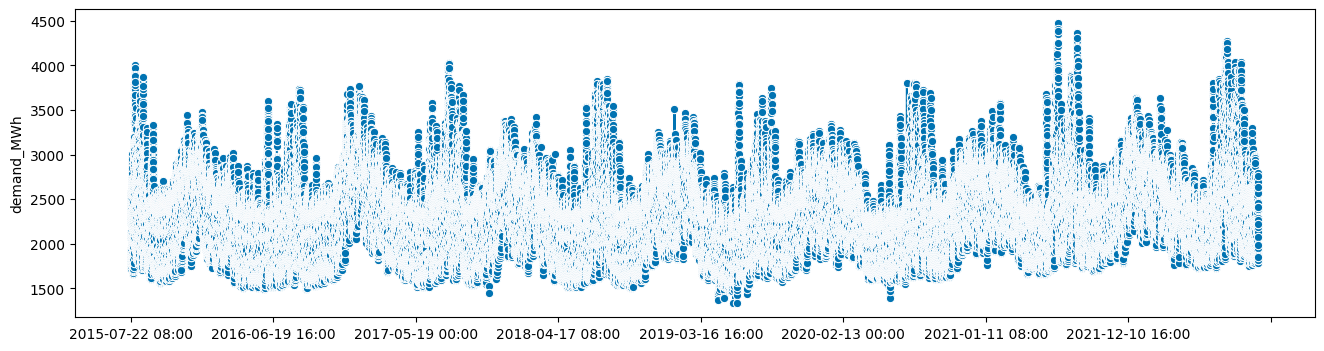

In [114]:
plot_series(full_y);